# **OBJECTIVE**:
The primary objective of this project is to predict the likelihood of a person having heart disease based on various health-related features. The goal is to build a predictive model that can classify whether an individual has heart disease or not by using machine learning techniques. The specific objectives of the project include:

Data Preprocessing:

Clean the data by handling any missing values, correcting data types, and removing any irrelevant or redundant features.
Address issues such as skewness in the dataset to ensure the model performs optimally.
Feature Selection:

Identify and select the most relevant features for the prediction task by analyzing correlations and removing non-contributing or redundant features.
Model Building:

Implement machine learning algorithms to create a classification model.
Train and test models such as Random Forest, Logistic Regression, and Ridge Classifier to predict whether a person has heart disease based on input features.
Model Evaluation:

Assess the model's performance using various evaluation metrics such as accuracy, precision, recall, and F1-score.
Compare the performance of different models and choose the best one for the task.
User Input-Based Prediction:

Develop a user interface or system that allows users to input health-related features (such as chest pain type, maximum heart rate, etc.) and receive a prediction on whether they have heart disease.
Conclusion and Future Steps:

Provide insights on the model's performance and suggest potential improvements, including the use of more advanced models, hyperparameter tuning, and cross-validation.
The overall aim of this project is to develop a tool that can assist in early diagnosis and detection of heart disease, potentially enabling better health interventions and management for individuals at risk.

# **Problem Statement:**
The project focuses on predicting whether a person has a heart disease or not based on various health parameters. The dataset used in this analysis contains several features related to heart health, such as chest pain type, resting blood pressure, maximum heart rate achieved, and others. The goal is to build a machine learning model that can predict whether a person is likely to have heart disease (target variable) based on these health features. This classification problem involves pre-processing, feature selection, model training, and evaluation.

Project Report:
1. Data Exploration:
The dataset contains several columns, which include features like age, sex, chest pain type (cp), maximum heart rate (thalach), and target (indicating whether the person has heart disease). Here's an overview of the data:

The dataset has 303 rows and 14 columns.
The target variable is binary (0 = no heart disease, 1 = heart disease).
There are no missing values or duplicate rows, ensuring data integrity.
The dataset has the following columns:

age: Age of the person
sex: Gender (1 = male, 0 = female)
cp: Chest pain type
trestbps: Resting blood pressure
chol: Serum cholesterol
fbs: Fasting blood sugar
restecg: Resting electrocardiographic results
thalach: Maximum heart rate achieved
exang: Exercise induced angina
oldpeak: Depression induced by exercise relative to rest
slope: Slope of peak exercise ST segment
ca: Number of major vessels colored by fluoroscopy
thal: Thalassemia
target: Outcome (0 = no heart disease, 1 = heart disease)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# 2. Data Pre-processing:
Handling Missing Values: No missing values were detected in the dataset (df.isnull().sum() showed no missing data).
Data Types: The features are correctly typed (numerical and categorical).
Data Transformation: Log transformation was applied to reduce skewness in the data. The distribution of features was plotted before and after transformation to visually check the effect.

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.duplicated().sum()

723

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

<Axes: xlabel='target', ylabel='Count'>

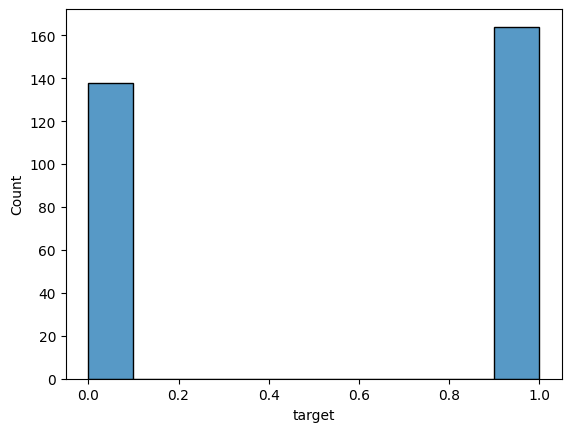

In [ ]:
sns.histplot(df["target"])

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

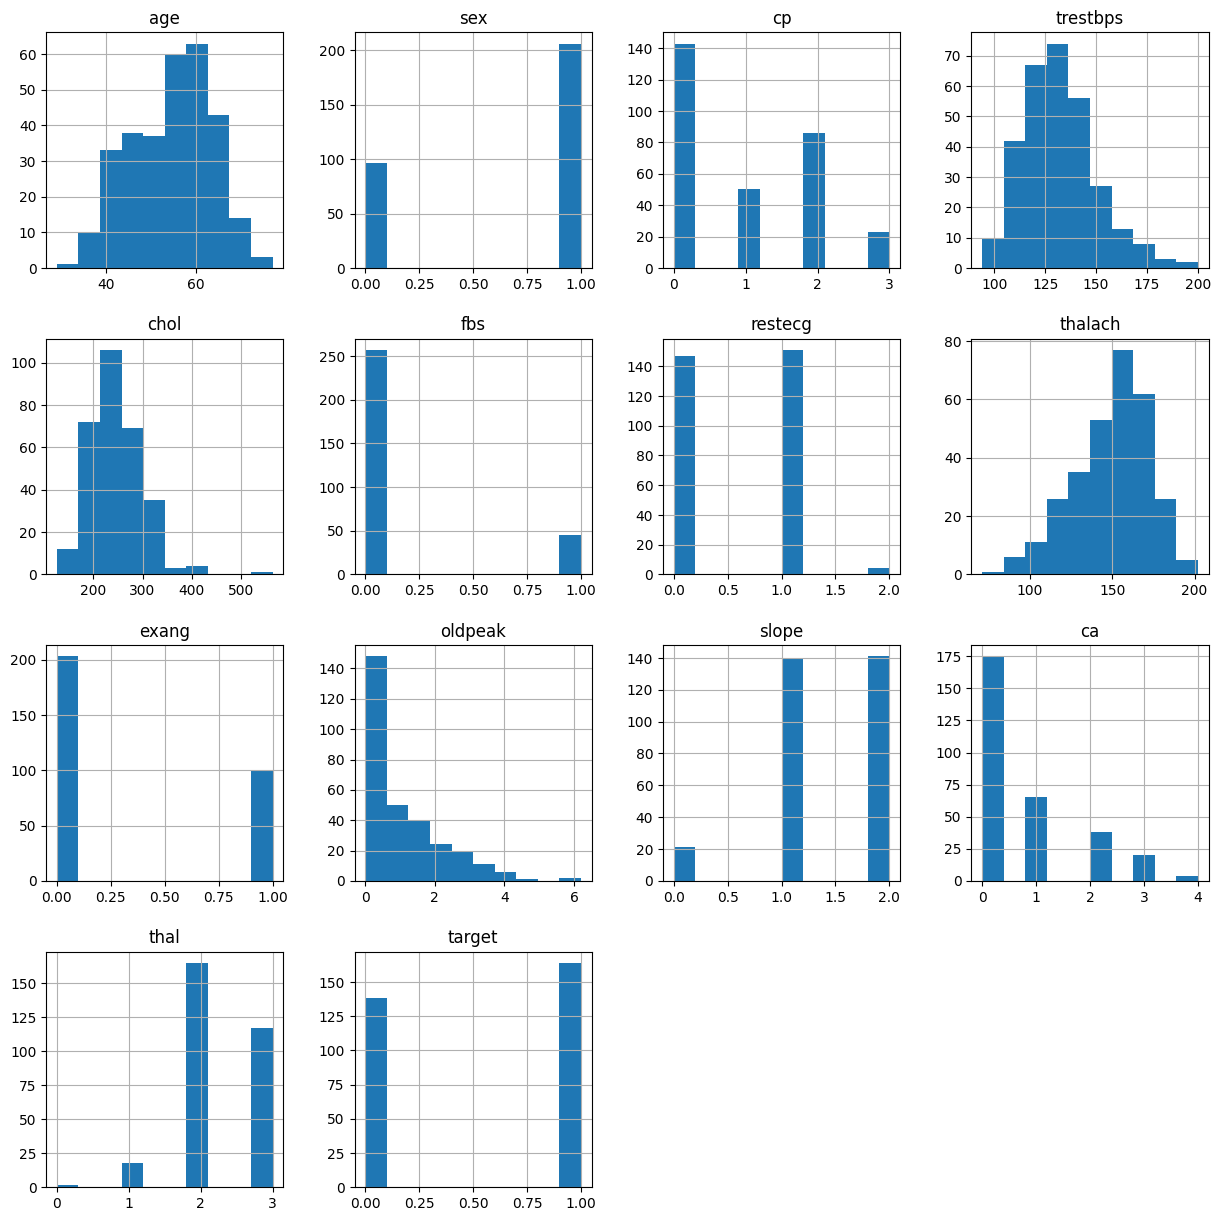

In [ ]:
df.hist(figsize=(15,15))

# 3. Feature Selection:
Based on the correlation matrix (df.corr()), certain features were identified as less relevant to the prediction task and were dropped. These include:

trestbps (resting blood pressure)
age
sex
chol (serum cholesterol)
restecg (resting electrocardiographic results)
fbs (fasting blood sugar)
After feature selection, the remaining relevant features for prediction are:

cp, thalach, exang, oldpeak, slope, ca, thal

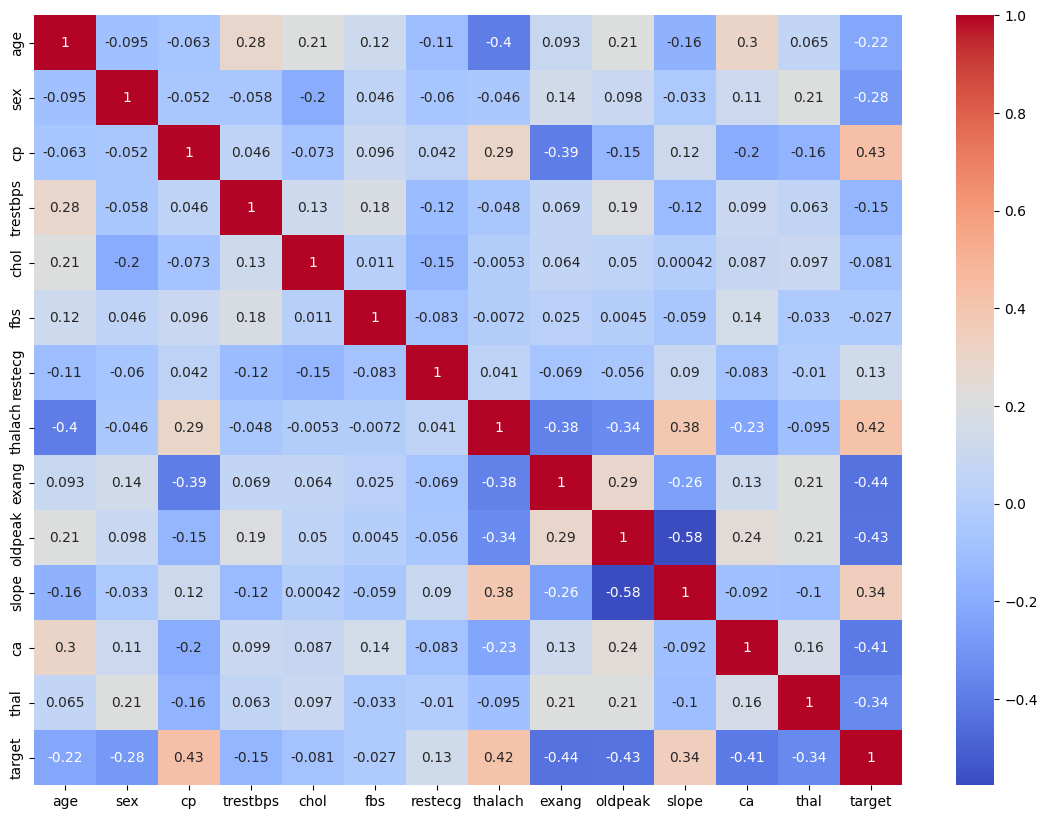

In [ ]:
corr_matrix=df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [ ]:
cor=df.corr()['target'].sort_values(ascending=False )
cor

,target
target,1.000000
cp,0.432080
thalach,0.419955
slope,0.343940
restecg,0.134874
fbs,-0.026826
chol,-0.081437
trestbps,-0.146269
age,-0.221476
sex,-0.283609


In [ ]:
df.drop(['trestbps'],axis=1,inplace=True)
df.drop(['age'],axis=1,inplace=True)
df.drop(['sex'],axis=1,inplace=True)
df.drop(['chol'],axis=1,inplace=True)
df.drop(['restecg'],axis=1,inplace=True)
df.drop(['fbs'],axis=1,inplace=True)

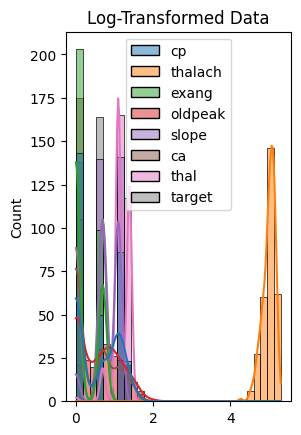

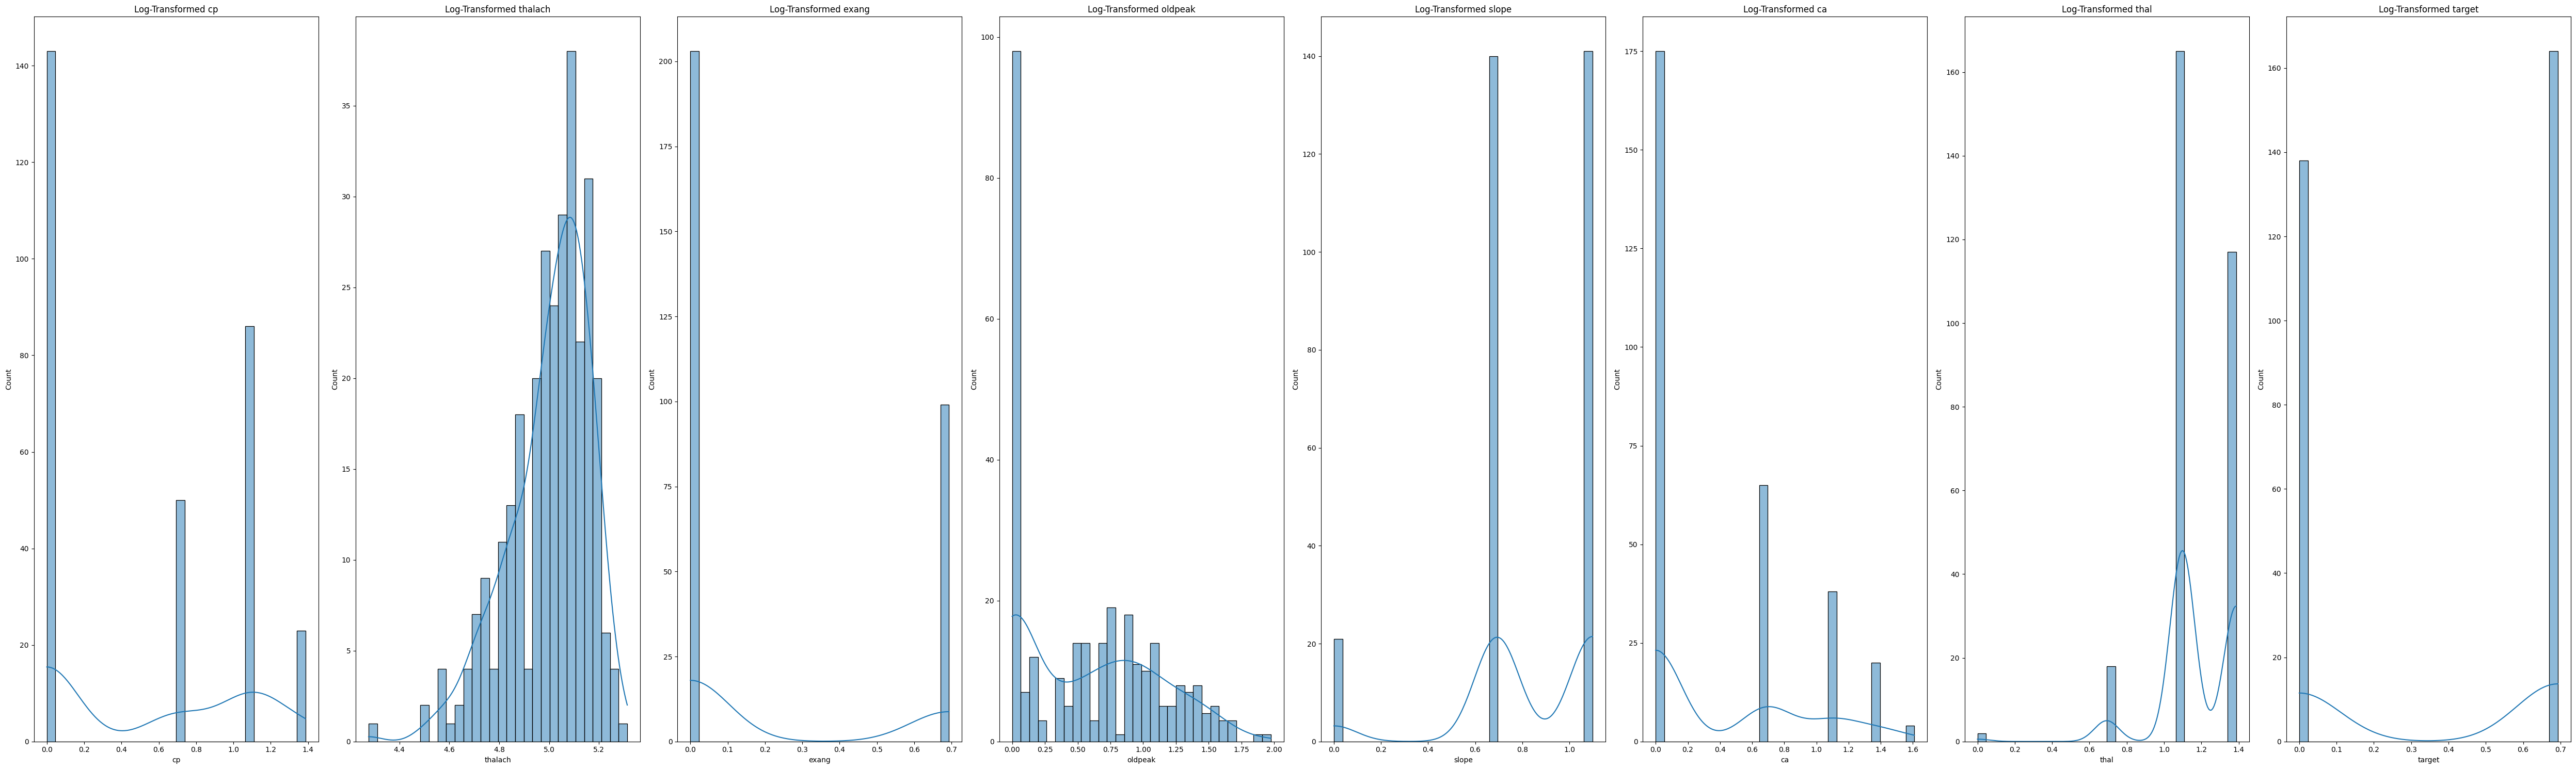

In [ ]:
#To handle skewness
import numpy as np
log_data = np.log(df + 1)  # Adding 1 to avoid log(0)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'], dtype='object')

In [ ]:
df['target'] = (df['target'] > 0.5).astype(int)
x=df[['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y=df['target']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

# 4. Modeling:
The data was split into training and testing sets using train_test_split (80% for training, 20% for testing). Three models were considered for the classification task:

Random Forest Classifier: Used for prediction due to its ability to handle complex relationships in data.
The chosen model, Random Forest Classifier, was trained on the training set and evaluated on the testing set. The model's performance metrics are as follows:

Accuracy: 0.85
Precision: 0.84 (Weighted)
Recall: 0.85 (Weighted)
F1 Score: 0.84 (Weighted)
These metrics indicate that the model is performing well, correctly identifying heart disease cases with a high degree of accuracy and balance between false positives and false negatives.

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))

print('Recall:', recall_score(y_test, y_pred, average="weighted"))

print('F1 Score:', f1_score(y_test, y_pred, average="weighted"))

Accuracy: 0.8688524590163934
Precision: 0.8760911219927613
Recall: 0.8688524590163934
F1 Score: 0.8687114401551208


In [ ]:
log_data

,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,0.000000,5.129899,0.000000,0.693147,1.098612,1.098612,1.386294,0.000000
1,0.000000,5.049856,0.693147,1.410987,0.000000,0.000000,1.386294,0.000000
2,0.000000,4.836282,0.693147,1.280934,0.000000,0.000000,1.386294,0.000000
3,0.000000,5.087596,0.000000,0.000000,1.098612,0.693147,1.386294,0.000000
4,0.000000,4.672829,0.000000,1.064711,0.693147,1.386294,1.098612,0.000000
...,...,...,...,...,...,...,...,...
723,1.098612,4.753590,0.000000,0.916291,0.693147,0.000000,1.098612,0.693147
733,1.098612,5.170484,0.000000,0.470004,0.693147,0.000000,1.098612,0.693147
739,0.000000,5.087596,0.693147,0.000000,1.098612,0.693147,1.386294,0.000000
843,1.386294,4.836282,0.000000,0.000000,1.098612,0.000000,1.098612,0.000000


In [ ]:
# Create a Random Forest Classifier object
model_rf = RandomForestClassifier()  # You can adjust hyperparameters
# Train the model
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions on the test set
y_pred = model_rf.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of model1:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy of model1: 0.8852459016393442
[[27  5]
 [ 2 27]]


# 5. Prediction:
A user can input values for the following features: cp, thalach, exang, oldpeak, slope, ca, and thal. Based on these inputs, the model predicts whether the user has heart disease (1) or not (0).

In [ ]:
cp=float(input("Enter cp:"))
thalach=float(input("Enter thalach:"))
exang=float(input("Enter exang:"))
oldpeak=float(input("Enter oldpeak:"))
slope=float(input("Enter slope:"))
ca=float(input("Enter ca:"))
thal=float(input("Enter thal:"))
user_input=[[cp,thalach,exang,oldpeak,slope,ca,thal]]
heart=model.predict(user_input)
print("heart: ",heart)

Enter cp:0.0
Enter thalach:5.12
Enter exang:0.0
Enter oldpeak:0.69
Enter slope:1.09
Enter ca:1.09
Enter thal:1.38
heart:  [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# 6. Conclusion:
The Random Forest model provides a strong prediction capability for determining the likelihood of heart disease based on several medical factors. The performance metrics suggest that the model is both accurate and reliable. By applying this model, healthcare professionals could potentially assist in early detection and treatment planning for individuals at risk of heart disease.

Next Steps:
Explore additional models (e.g., Logistic Regression, Ridge Classifier) to compare performance.
Investigate the impact of hyperparameter tuning on the Random Forest Classifier.
Consider using cross-validation to evaluate model stability and robustness.